<center><h1>Missing Value Handling with Python</h1></center>
<br>
<img src="img/missing_head.jpg" alt="drawing" height="100" width="600">

About 80 percent of a data scientist's valuable time is spent for finding, cleaning, and organizing data while only about 20 percent of time is spent for further analysis. And, it is a crucial task to perform the data cleaning more accurately for perfect analysis and perfect modeling of the data. In real world data, there are some instances where a particular element is absent because of various reasons, such as, corrupt data, failure to load the information, or incomplete extraction. That's why one of the most greatest challanges faced by analyst during data cleaning is handling the missing values as there exist no particular solution for this problem. In this post, we will try to carry out some techniques to deal with the missing data depending upon the occurances so as to we can be able to clean the data more quickly.

## Types of missing data

Before jumping to deal with the missing data, we must need to gather knowledge about the nature of the missing data. Data can be missing in the following ways:

<img src="img/types_of_missing_data.png" alt="Types of Missing Data" width="600">

* **Missing Completely At Random (MCAR):**
Values in a data set are considered as missing completely at random if missing values are randomly distributed across all observations. In MCAR, a data point to be missing is independent both of observable variables and of unobservable parameters of interest.That means the missing data has no relation with its hypothetical value and with the values of other variables.


* **Missing At Random (MAR):**
The basic difference between MCAR and MAR is that under MAR the data is not missing randomly across all observations but is missing randomly only within sub-samples of data. In MAR, the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.


* **Missing Not At Random (MNAR):**
In MNAR, the value of the variable that's missing is related to the reason it's missing. There could be two possible reasons that are missing value depends on the hypothetical value (e.g. In a class, students with low CGPA generally do not want to reveal their CGPA) or missing value dependents on some other variable’s value (e.g. Let’s assume that female student generally don’t want to reveal their ages! Here the missing value in the age variable is influenced by gender variable).


> *In the first two cases (MCAR & MAR), it is safe to remove the data with missing values depending upon their occurrences, while in the third case (MNAR) removing observations with missing values can produce a bias in the model. Thus, MNAR is also known as nonignorable nonresponse.*


## Dealing with missing data

We’re going to work with the following dataset which is much smaller than what you will typically work with. 

|__Flat_No__|__Num. of Bed Room__|__Num. of family member__|__Owner's Profession__|
|-----------|----------------|-----------------------|--------------------------|
|        101|               1|                      4|              Doctor|
|        102|               2|                   null|         Businessman|
|        103|   not available|                      3|             Teacher|
|        104|               2|                      5|         Businessman|
|        105|               3|                      4|            Engineer|
|        106|             NaN|                      2|              Doctor|
|        107|             N/A|                      6|         Businessman|
|        108|               1|                      3|         Businessman|
|        109|               2|                   -   |            Engineer|
|        110|               1|                      2|            Engineer|
|        111|              NA|                      4|         Businessman|
|        112|               3|                   None|         Businessman|
|        113|              na|                      2|             Teacher|
|        114|               1|                      3|              Doctor|
|        115|               2|                missing|            Engineer|

Even though it’s a small dataset, it highlights a lot of real-world situations that we will encounter. Now, we will load the dataset into a pandas dataframe by run the following python code.

In [112]:
#import libraries
import numpy as np
import pandas as pd

#read csv file into a pandas dataframe
df = pd.read_csv('data_with_missingValue.csv', encoding='UTF-8')

After loading the data we can use ```.isnull()``` method to find out the missing data.

In [113]:
df.isnull()

,Flat_No,Num. of Bed Room,Num. of family member,Owner's Profession
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


Using the ```.isnull()``` method, we have confirmed that "NaN", "N/A", "NA", "null", and blank space were recognized as missing values by pandas. Unfortunately, the other types("not available", "missing", "na", "None") weren't recognized as missing values. When multiple users manually entering the data then it is a common problem because one like to use "NA" while another like to use "na".

We can solve this problem by mentioning a list of the different format of missing values in the following way when pandas import the data.

In [114]:
missing_values = ["not available", "missing", "na", "None"]
df = pd.read_csv('data_with_missingValue.csv', encoding='UTF-8', na_values= missing_values)

Now, let's take another look at the data and see what happens.

In [115]:
df.isnull()

,Flat_No,Num. of Bed Room,Num. of family member,Owner's Profession
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


This time, all of the different formats were recognized as the missing data. Let's print out the number of missing values in each of the feature.

In [116]:
#number of missing value in each of the columns
df.isnull().sum()

Flat_No                  0
Num. of Bed Room         5
Num. of family member    3
Owner's Profession       0
dtype: int64

We can also print out only the rows which contain missing values by

```python
#display the rows that contain missing value
df[df.isnull().any(axis = 1)]
```

Now, we need to figure out how we want to handle missing values. Sometimes we simply delete the missing rows (or columns), other times we need to replace them. The following tree diagram shows the common techniques through which we can easily handle the missing data.


<img src="img/Handling Missing Data.png" alt="Handling Missing Data" width="700">

## Deletion

It is the most common way to handle the missing value. In this process, a particular row or column is removed based on the missing data. If there are (70-75)% missing data in a particular row or column than we prefer to delete those row or columns. we can do this by using a pandas method ```.dropna()```. Let's see several different way how we can apply this.

```python

df.dropna()                    #drop rows that contain missing data
df.dropna(axis = 1)            #drop columns that contain missing data
df.dropna(how = 'all')         #drop the rows if all columns of the rwo contain missing data
df.dropna(thresh = 2)          #a row must have atleast 2 data points otherwise it will be droped
df.dropna(subset = ['price'])  #drop the rows with respect to the missing values in specified columns

```

This method is advised only for the large dataset but one has to make sure that after we have deleted the data, there is no addition of bias. Removing the data may lead the loss of valuable information and thus a model can't learn properly from the data to predict the output.

## Imputation

Now, Let us look at different ways of imputing the missing values.

### 1. Replacing with Mean/ Median/ Mode
This strategy is a statistical approach of handling the missing values. A better option is replacing the missing values of a particular feature by the mean value of that feature rather than deletion.For continuous/numeric features no matter how many times we add mean, because it still gets conserved. Let's see how:


>  Let's assume a feature contains three data points 3, 7, and 8 have mean = (3 + 7 + 8) / 3 = 6

>  If this feature has an infinite number of missing values, let's impute it with mean: 3, 7, 8, 6, 6, 6, 6 .... .The mean will remain 6 no matter how many times we add it!

But, drawback with mean is that it is heavily influenced by the outliers. For example: 4, 7, 5, 48 has the mean 16!
Moreover, mean is also the worst in reflecting central tendency of a normal data. The mode is best reflects the central tendency which is the most frequent value of a feature. But, it causes ambiguity for the continuous data as there might be more than one mode or even none at all if none of the values are repeated. Thus, we can impute the mode for the features that are categorical in nature.

After mode, median reflects the central tendency the best and use of the median is better than the mean for the features that are continuous in nature. If the data points are arranged in order than the middle point is the median. If we see the aforementioned example, it can be observed that, unlike mean, median is not influenced by the outliers. That is: 4, 5, 7, 48 has the median 6.

> Thus, for categorical feature imputing mode makes more sense and for continuous feature the median.

Imputing missing value with median or mode can be perfomed by ```.fillna()``` method of pandas as follow:

``` python
# Replace by median 
median = df['Num. of Bed Room'].median()
df['Num. of Bed Room'].fillna(median, inplace=True)

# Replace by mode
mode = df['Num. of Bed Room'].mode()
df['Num. of Bed Room'].fillna(mode, inplace=True)
```

### 2. Random but Proportional Replacement (RBPR)

From the above technique, it can be observed that the imputation of the missing value is carried out by a single value (either the mean or the median or the mode). But, in our current technique, we’ll replace the missing values randomly in a ratio which is proportional to the instances without missing value. And, for this we will make the use of probability. It would be better if we use the data points of "Num. of Bed Room" column from our demo dataset for the explanation. Let's represent it as a ordered list:

In [49]:
df['Num. of Bed Room'].sort_values().tolist()

[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, nan, nan, nan, nan, nan]

From the list, we can notice that there are sets of 4 ones, 4 twos, 2 threes, and 5 nans. Now, lets calculate the probability(P) and expected value(E) for the missing value.


> *Probability of 1 occuring in NaNs:*
>    $$ P = (Num. of 1s) / (Num. of data points without NaNs) $$
>    $$ = 4 / 10 $$
>    $$ = 2 / 5 $$
>    $$ E = P*(total num. of NaNs) = (2/5)*5 = 2 $$
> Similarly, the expected value of *2 occuring in NaNs* is 2 and *3 occuring in NaNs* is 1.

We can see, the ratio of ones, twos, and threes occuring in NaNs is (2 : 2 : 1). Now, imputing the NaNs with the proportion of non-NaNs results in the following updated list:

<center> $ [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, 1, 2, 2, 3] $ </center>

while imputing with mean(1.8) results in:

<center> $ [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1.8, 1.8, 1.8, 1.8, 1.8] $ </center>

Let's generate a box-plot for this three lists for clear observation.

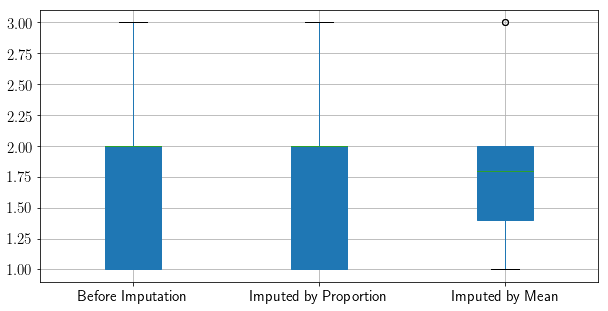

In [95]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
x = pd.DataFrame({
    'Before Imputation': [1,1,1,1,2,2,2,2,3,3,np.nan, np.nan, np.nan, np.nan, np.nan],
    'Imputed by Proportion': [1,1,1,1,2,2,2,2,3,3,1,1,2,2,3],
    'Imputed by Mean': [1,1,1,1,2,2,2,2,3,3,1.8,1.8,1.8,1.8,1.8]
})
x.boxplot(patch_artist=True, fontsize=15)

From the box-plot, the key observations are:
* Proportional imputation has far __better data distribution__ than the mean imputation.
* Mean imputation affects the distribution with "3"; originally it wasn't a outlier while proportional imputation has the original status. This shows, proportional imputation is __less biased__.
* The chances of this method to over-fit a model is definitely lesser than imputing with mean/median/mode.


### 3. Predicting the Missing Data

We can predict the missing values of a particular feature with the help a machine learning algorithm. In this process, the features that doesn't contain any missing value will act as the predictors while the missing value containing feature will act as the target column. Different types of machine learning algorithm can be applied based on the nature of the data. This method may result in better accuracy, unless a missing value is expected to have a very high variance.

Hopefully, you have enjoyed this post.

If you have any questions about this post, please feel free to ask your questions in the comments and I will do my best to answer.

#### Resources:
1. https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4																									
2. https://www.datascience.com/blog/missing-data-imputation																									
3. https://www.freecodecamp.org/news/the-penalty-of-missing-values-in-data-science-91b756f95a32/																									
4. https://www.analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/																									
5. https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b																									
6. https://machinelearningmastery.com/handle-missing-data-python/																									